I noticed that there are lots of features that could probably be grouped together. How about we have a look at feature correlations next?

In [2]:
import pandas as pd
from dfply import mask, X

import seaborn as sns
import matplotlib.pyplot as plt

## Correlations

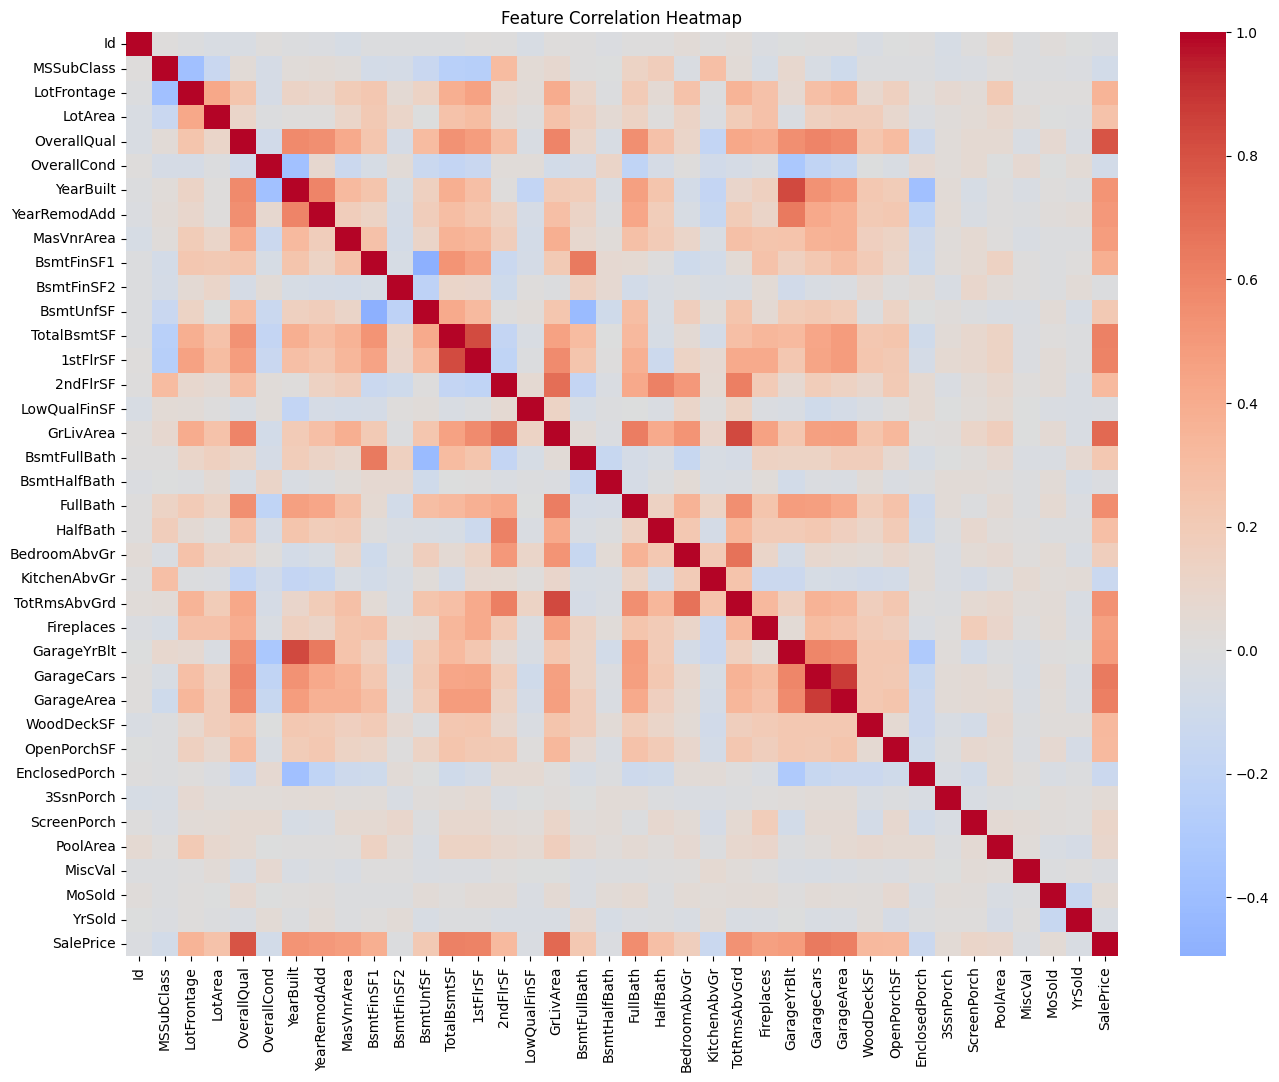

In [3]:
# Load the training data
df = pd.read_csv("../data/raw/train.csv")

# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

From the numerical features, I'm interested in the number of baths:

## Add no of baths

In [5]:
df['TotalBaths'] = df['FullBath'] + (0.5 * df['HalfBath'])
df['GarageFinish_Unf'] = df['GarageFinish'] == 'Unf'

In [6]:
top = ['OverallQual',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 'GarageFinish_Unf',
 'CentralAir',
 'TotalBaths',]

In [7]:
from pycaret.regression import *
experiment = setup(data=df[top + ['SalePrice']], target='SalePrice', session_id=123, transform_target=True, keep_features=top) 

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 8)"
4,Transformed data shape,"(1460, 8)"
5,Transformed train set shape,"(1021, 8)"
6,Transformed test set shape,"(439, 8)"
7,Numeric features,5
8,Categorical features,1
9,Keep features,7


In [ ]:
model = compare_models() # 0.1666

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,21395.0583,1042827446.5156,31902.9274,0.8382,0.1666,0.1246,0.0520
lightgbm,Light Gradient Boosting Machine,22514.4851,1239895069.9386,34673.3376,0.8125,0.1734,0.1306,0.0990
et,Extra Trees Regressor,22669.9004,1332245427.4913,35285.3036,0.8004,0.1788,0.1312,0.0870
rf,Random Forest Regressor,22900.1013,1429575922.3767,36685.2450,0.7885,0.1783,0.1323,0.1060
ada,AdaBoost Regressor,26979.5750,1568982420.8807,39191.0835,0.7596,0.2006,0.1548,0.0490
dt,Decision Tree Regressor,30566.4364,2350256849.8765,47389.6492,0.6389,0.2445,0.1782,0.0210
lr,Linear Regression,23462.5218,2540709533.3626,43429.1773,0.6221,0.1822,0.1369,0.0210
lar,Least Angle Regression,23462.5218,2540709533.3626,43429.1773,0.6221,0.1822,0.1369,0.0190
ridge,Ridge Regression,23459.2458,2543729985.3365,43440.8381,0.6217,0.1822,0.1369,0.0220
br,Bayesian Ridge,23454.2489,2551853294.3092,43475.3246,0.6205,0.1821,0.1369,0.0190


In [10]:
import plotly.express as px
px.histogram(x=model.feature_importances_, y=model.feature_names_in_).update_yaxes(categoryorder='total ascending')

Small improvement, we keep it.

## Add second floor

In [ ]:
experiment

## Check categorical features

In [14]:
for col in df.select_dtypes(include='object').columns:
    fig = px.box(df.fillna('unknown'), x='SalePrice', color=col)
    fig.show()

## Add MSZoning

In [17]:
top = ['OverallQual',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 'GarageFinish_Unf',
 'CentralAir',
 'TotalBaths',
 'MSZoning',]

In [18]:
from pycaret.regression import *
experiment = setup(data=df[top + ['SalePrice']], target='SalePrice', session_id=123, transform_target=True, keep_features=top) 

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 9)"
4,Transformed data shape,"(1460, 13)"
5,Transformed train set shape,"(1021, 13)"
6,Transformed test set shape,"(439, 13)"
7,Numeric features,5
8,Categorical features,2
9,Keep features,8


In [ ]:
model = compare_models() # 0.1561

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:24:53
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,20819.6835,1044690379.8784,31688.0614,0.8392,0.1561,0.1184,0.0640
lightgbm,Light Gradient Boosting Machine,21897.3203,1205268177.7806,34258.5554,0.8174,0.1670,0.1251,0.1310
et,Extra Trees Regressor,22278.2683,1232541602.9374,34252.5574,0.8116,0.1706,0.1274,0.1010
rf,Random Forest Regressor,22144.8443,1377490571.3390,36060.8689,0.7959,0.1700,0.1267,0.1290
ada,AdaBoost Regressor,26790.7780,1528372040.0263,38620.5478,0.7675,0.1955,0.1538,0.0580
dt,Decision Tree Regressor,29430.0150,2200710024.6505,46008.2168,0.6612,0.2315,0.1717,0.0270
lr,Linear Regression,22732.2565,2279679248.1028,41887.9216,0.6597,0.1727,0.1297,0.7800
lar,Least Angle Regression,22732.2565,2279679248.1027,41887.9216,0.6597,0.1727,0.1297,0.0270
ridge,Ridge Regression,22724.0869,2283849640.8536,41897.5598,0.6591,0.1727,0.1298,0.0290
br,Bayesian Ridge,22725.7970,2285538126.8949,41902.4118,0.6589,0.1729,0.1299,0.0270
